[Plots.jl] Initializing backend: pyplot



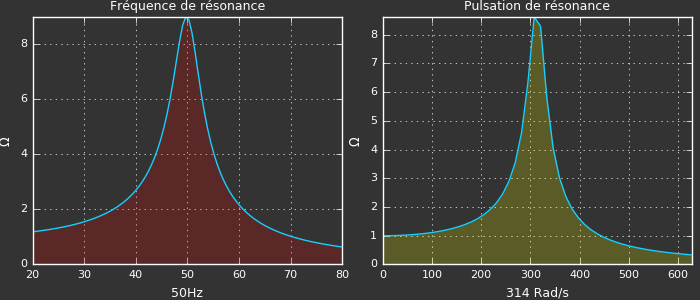

In [1]:
using Plots
pyplot(size=(700,300),leg=false,
guidefont=font(9), titlefont=font(9));
R=40;L=1/pi*360E-2;C=1/(pi*360E+2);w=1/(sqrt(L*C))
fr=linspace(20,80,100)
ω=linspace(20,80,100)
y= abs(1 ./ (1+im*2π*ω*R*C-(2π*ω).^2*L*C))
m=plot(fr,y,title="Fréquence de résonance",
fill=(0,0.2,:red),bg=RGB(.2,.2,.2),
xlabel ="50Hz",ylabel = "Ω");
################################
q=linspace(0,2w)
p=abs(1./(1+im.*q.*R.*C-q.*q.*L.*C));
n=plot(q,p,title="Pulsation de résonance",
fill=(0,0.2,:yellow),
bg=RGB(.2,.2,.2),
xlabel = "314 Rad/s",
ylabel = "Ω")
################################
plot(m,n,layout=2)

In [2]:
#r=40;l=1/pi*360E-2;l=1/(pi*360E+2);
#w=1/(sqrt(l*c));

 in depwarn at ./deprecated.jl:73
while loading In[8], in expression starting on line 9



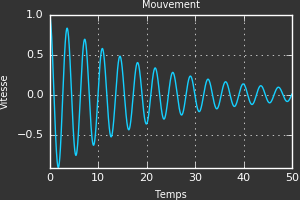

In [8]:
using Sundials,ODE,Plots
pyplot(size=(300,200),leg=false,
guidefont=font(7), titlefont=font(7));
function oscillator(t, y, ydot)
    ydot[1] = y[2]
    ydot[2] = - 3*y[1] - y[2] / 10
end
initial = [1.0,0.0];                   # Initial conditions
t = float([0.0:0.01:50]);                # Time steps for solution
xv = Sundials.cvode(oscillator, initial, t);
xv[1:5,:]
plot(t,xv[:,1],title="Mouvement",
bg=RGB(.2,.2,.2),
xlabel ="Temps",ylabel = "Vitesse")


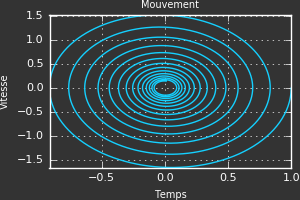

In [9]:
#listet=initial
vₓ=xv[:,1]
vᵥ=xv[:,2]
plot(vₓ,vᵥ,title="Mouvement",
bg=RGB(.2,.2,.2),
xlabel ="Temps",ylabel = "Vitesse")

In [6]:
function pendulum(t, y)
    Y = [
    6 * (2 * y[3] - 3 * cos(y[1] - y[2]) * y[4]) / (16 - 9 * cos(y[1] - y[2])^2);
    6 * (8 * y[4] - 3 * cos(y[1] - y[2]) * y[3]) / (16 - 9 * cos(y[1] - y[2])^2)
    ]
    [
    Y[1];
    Y[2];
    - (Y[1] * Y[2] * sin(y[1] - y[2]) + 3 * sin(y[1])) / 2;
    - (sin(y[2]) - Y[1] * Y[2] * sin(y[1] - y[2])) / 2;
    ]
end
initial = [3/4 * pi, pi, 0, 0];         # Initial conditions -> chaotic behaviour
# initial = [pi / 4, 0, 0, 0];          # Initial conditions -> deterministic behaviour

T, xv = ode23(pendulum, initial, [0.; 40]);
xv = hcat(xv...).';


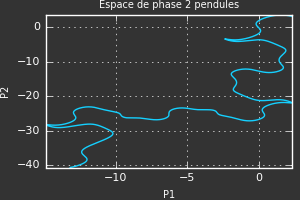

In [7]:
vₓ=xv[:,1]
vᵥ=xv[:,2]
plot(vₓ,vᵥ,title="Espace de phase 2 pendules",bg=RGB(.2,.2,.2),
xlabel ="P1",ylabel = "P2")